In [ ]:
from google.colab import files
uploaded = files.upload()


Saving healthcare_dataset.csv to healthcare_dataset.csv


In [ ]:
# Install all required packages
!pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost shap imbalanced-learn


In [ ]:
import pandas as pd

# Load CSV file
df = pd.read_csv("healthcare_dataset.csv")

# View structure
print("Shape:", df.shape)
print(df.head())   # Show first 5 rows
print(df.info())   # Data types and nulls
print(df.describe())  # Stats

Shape: (55500, 15)
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("healthcare_dataset.csv")

# Basic info
print("Shape of data:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Sample:\n", df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Data types
print("\nData types:\n", df.dtypes)

Shape of data: (55500, 15)

Columns:
 Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

Data Sample:
             Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc    

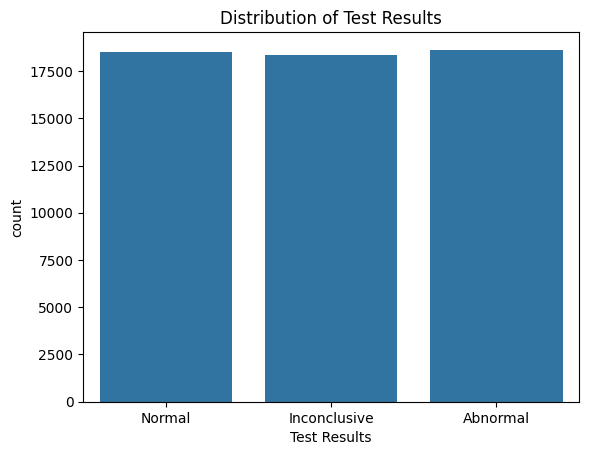

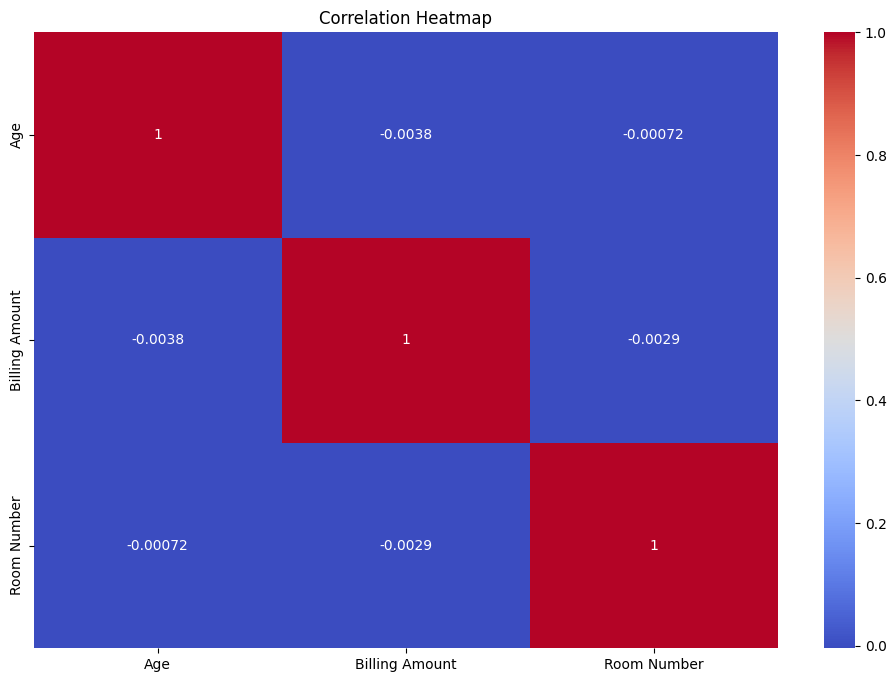

In [ ]:
# Target column
target_col = 'Test Results'

# Target value distribution
sns.countplot(x=target_col, data=df)
plt.title("Distribution of Test Results")
plt.show()

# Correlation heatmap for numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import pandas as pd
from datetime import timedelta

# Convert date columns to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')

# Sort data by Name and Date of Admission
df = df.sort_values(by=['Name', 'Date of Admission']).reset_index(drop=True)

# Create a new column for readmission
df['readmitted'] = 0  # default is 0 (not readmitted)

# Iterate through each patient's admissions
for i in range(1, len(df)):
    if df.loc[i, 'Name'] == df.loc[i - 1, 'Name']:
        prev_discharge = df.loc[i - 1, 'Discharge Date']
        current_admission = df.loc[i, 'Date of Admission']
        if pd.notnull(prev_discharge) and pd.notnull(current_admission):
            # Calculate days between previous discharge and current admission
            days_between = (current_admission - prev_discharge).days
            if 0 < days_between <= 30:
                df.loc[i, 'readmitted'] = 1


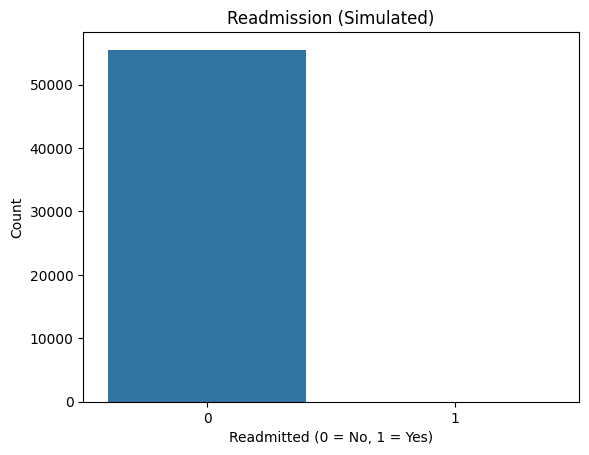

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='readmitted', data=df)
plt.title("Readmission (Simulated)")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [ ]:
import pandas as pd
from datetime import timedelta

# 1. Load your original file
df = pd.read_csv("healthcare_dataset.csv")

# 2. Convert Admission/Discharge columns to datetime
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], dayfirst=True, errors="coerce")
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"], dayfirst=True, errors="coerce")

# 3. Sort by Name and Admission Date
df = df.sort_values(by=["Name", "Date of Admission"]).copy()

# 4. Initialize Readmitted column to 0
df["Readmitted"] = 0

# 5. Detect readmission within 30 days
repeated_names = df["Name"].value_counts()[df["Name"].value_counts() > 1].index

for name in repeated_names:
    patient_visits = df[df["Name"] == name]
    for i in range(len(patient_visits) - 1):
        discharge = patient_visits.iloc[i]["Discharge Date"]
        next_admit = patient_visits.iloc[i + 1]["Date of Admission"]
        if pd.notnull(discharge) and pd.notnull(next_admit):
            if (next_admit - discharge) <= timedelta(days=30):
                df.loc[patient_visits.index[i + 1], "Readmitted"] = 1

# 6. Check balance
print(df["Readmitted"].value_counts())

# 7. Save updated CSV
df.to_csv("hospital_readmission_processed.csv", index=False)
print("✅ Saved: hospital_readmission_processed.csv")

/tmp/ipython-input-13-2090381225.py:8: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], dayfirst=True, errors="coerce")


Readmitted
0    54167
1     1333
Name: count, dtype: int64
✅ Saved: hospital_readmission_processed.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("hospital_readmission_processed.csv")


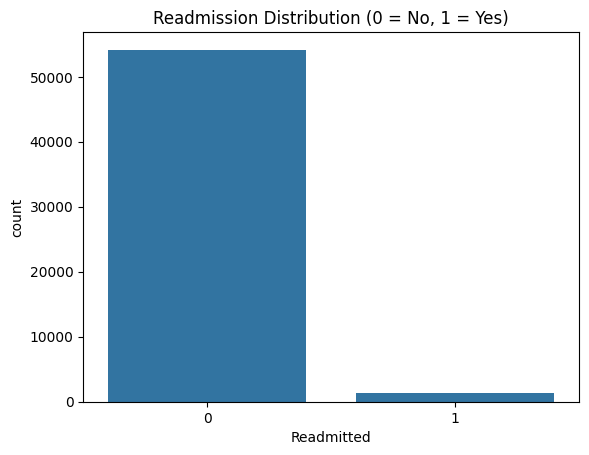

In [ ]:
sns.countplot(data=df, x="Readmitted")
plt.title("Readmission Distribution (0 = No, 1 = Yes)")
plt.show()


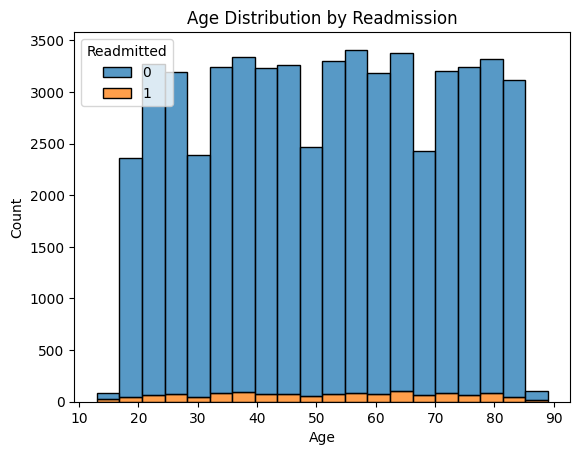

In [ ]:
sns.histplot(data=df, x="Age", hue="Readmitted", multiple="stack", bins=20)
plt.title("Age Distribution by Readmission")
plt.show()


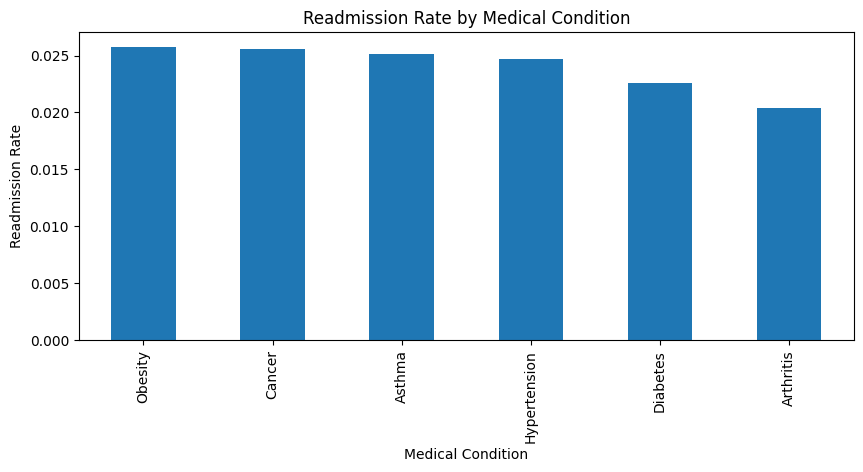

In [ ]:
cond_stats = df.groupby("Medical Condition")["Readmitted"].mean().sort_values(ascending=False)
cond_stats.plot(kind="bar", title="Readmission Rate by Medical Condition", figsize=(10,4))
plt.ylabel("Readmission Rate")
plt.show()


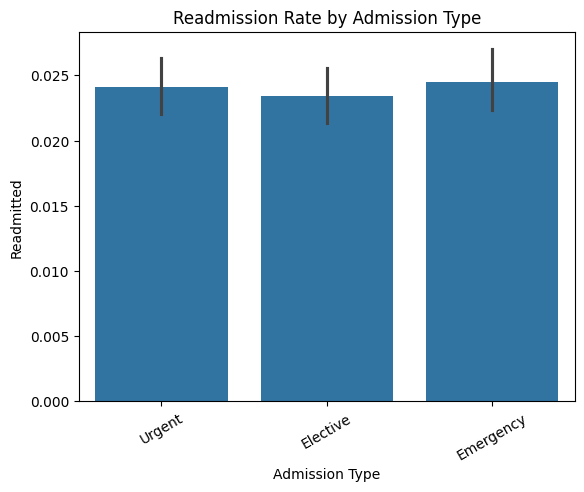

In [ ]:
sns.barplot(data=df, x="Admission Type", y="Readmitted")
plt.title("Readmission Rate by Admission Type")
plt.xticks(rotation=30)
plt.show()


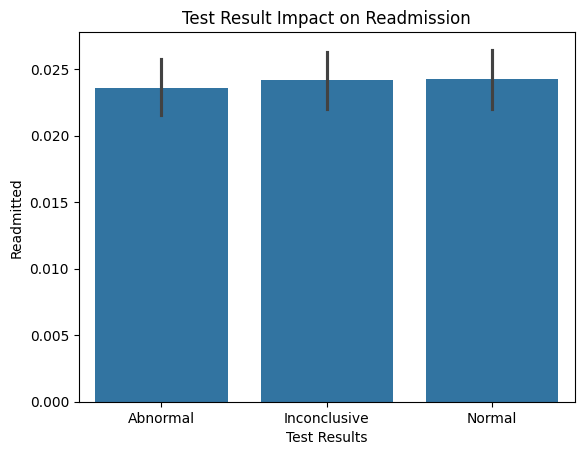

In [ ]:
sns.barplot(data=df, x="Test Results", y="Readmitted")
plt.title("Test Result Impact on Readmission")
plt.show()


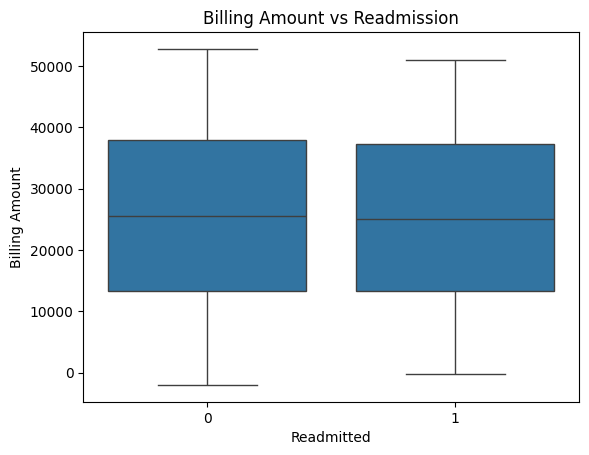

In [ ]:
sns.boxplot(data=df, x="Readmitted", y="Billing Amount")
plt.title("Billing Amount vs Readmission")
plt.show()


In [ ]:
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], dayfirst=True)
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"], dayfirst=True)
df["Length_of_Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days


/tmp/ipython-input-21-189715683.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], dayfirst=True)


In [ ]:
!pip install imbalanced-learn shap lightgbm xgboost joblib


Saving healthcare_dataset.csv to healthcare_dataset.csv
✅ Saved: hospital_readmission_processed.csv


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:12:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 39999, number of negative: 39999
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5121
[LightGBM] [Info] Number of data points in the train set: 79998, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



🏆 Best Model: LightGBM
ROC-AUC: 0.5252, F1 Score: 0.0719

Confusion Matrix:
 [[10000     0]
 [ 1059    41]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     10000
           1       1.00      0.04      0.07      1100

    accuracy                           0.90     11100
   macro avg       0.95      0.52      0.51     11100
weighted avg       0.91      0.90      0.86     11100



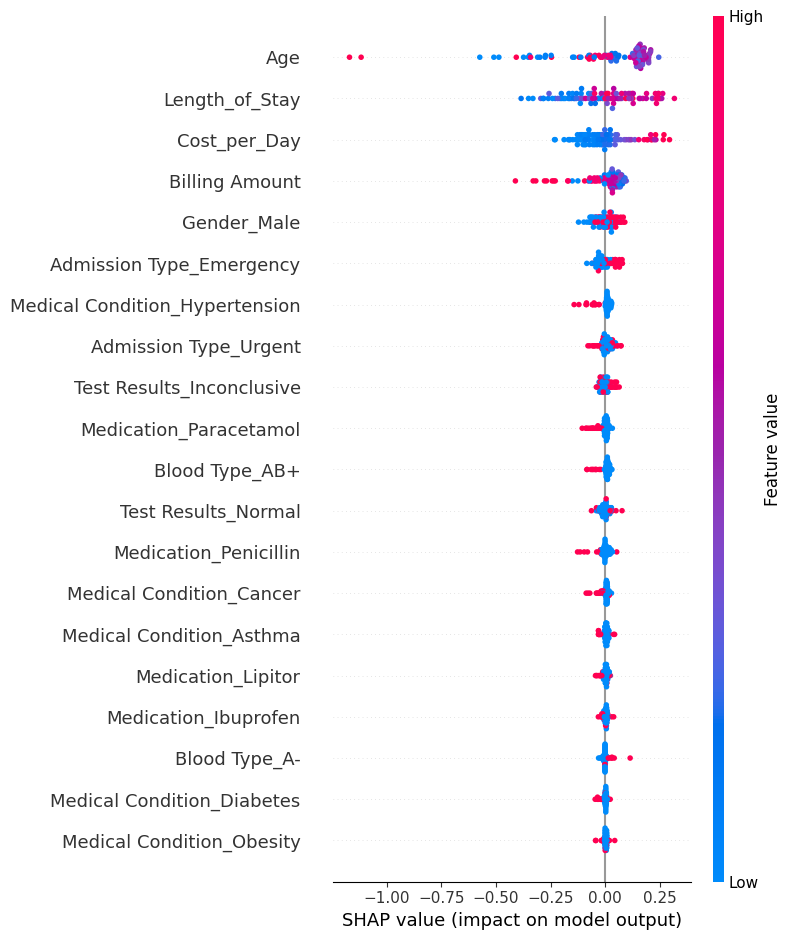

['scaler.pkl']

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import shap
import joblib
from datetime import timedelta

# Upload the dataset
uploaded = files.upload()

# 1. Load your original file
df_initial = pd.read_csv("healthcare_dataset.csv")

# 2. Convert Admission/Discharge columns to datetime
df_initial["Date of Admission"] = pd.to_datetime(df_initial["Date of Admission"], errors="coerce")
df_initial["Discharge Date"] = pd.to_datetime(df_initial["Discharge Date"], errors="coerce")

# 3. Sort by Name and Admission Date
df_initial = df_initial.sort_values(by=["Name", "Date of Admission"]).copy()

# 4. Initialize Readmitted column to 0
df_initial["Readmitted"] = 0

# 5. Detect readmission within 30 days
repeated_names = df_initial["Name"].value_counts()[df_initial["Name"].value_counts() > 1].index

for name in repeated_names:
    patient_visits = df_initial[df_initial["Name"] == name]
    for i in range(len(patient_visits) - 1):
        discharge = patient_visits.iloc[i]["Discharge Date"]
        next_admit = patient_visits.iloc[i + 1]["Date of Admission"]
        if pd.notnull(discharge) and pd.notnull(next_admit):
            if (next_admit - discharge) <= timedelta(days=30):
                df_initial.loc[patient_visits.index[i + 1], "Readmitted"] = 1

# 6. Save updated CSV
df_initial.to_csv("hospital_readmission_processed.csv", index=False)
print("✅ Saved: hospital_readmission_processed.csv")


# Load dataset
df = pd.read_csv("hospital_readmission_processed.csv")

# Drop high-cardinality columns
df.drop(columns=['Name', 'Doctor', 'Hospital', 'Insurance Provider', 'Room Number'], inplace=True, errors='ignore')

# Feature engineering
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"])
df["Length_of_Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days
df["Cost_per_Day"] = df["Billing Amount"] / df["Length_of_Stay"]
df.drop(columns=["Date of Admission", "Discharge Date"], inplace=True)

# Clean nulls/infs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categoricals
df = pd.get_dummies(df, drop_first=True)

# Split data
X = df.drop("Readmitted", axis=1)
y = df["Readmitted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE for imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=6, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_res, y_res)
    preds = model.predict(X_test_scaled)
    proba = model.predict_proba(X_test_scaled)[:, 1]
    results[name] = {
        "F1 Score": f1_score(y_test, preds),
        "ROC-AUC": roc_auc_score(y_test, proba),
        "Model": model
    }

# Best model
best = max(results.items(), key=lambda x: x[1]['ROC-AUC'])
best_model_name, best_model_data = best
best_model = best_model_data["Model"]

print(f"\n🏆 Best Model: {best_model_name}")
print(f"ROC-AUC: {best_model_data['ROC-AUC']:.4f}, F1 Score: {best_model_data['F1 Score']:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_model.predict(X_test_scaled)))
print("\nClassification Report:\n", classification_report(y_test, best_model.predict(X_test_scaled)))

# SHAP explainability
explainer = shap.Explainer(best_model, X_train_scaled)
shap_values = explainer(X_test_scaled[:100])
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns)

# Save model
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

In [ ]:
# 📦 STREAMLIT APP TO DEMO READMISSION RISK PREDICTION

import streamlit as st
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# Load model and scaler
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")

st.set_page_config(page_title="Hospital Readmission Predictor", layout="wide")
st.title("🏥 Predict Hospital Readmission Risk")
st.markdown("Upload patient records to get real-time readmission risk predictions.")

# Upload CSV
uploaded_file = st.file_uploader("📤 Upload Patient CSV", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)

    # Keep copy for display
    raw_df = df.copy()

    # Feature engineering
    df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], dayfirst=True)
    df["Discharge Date"] = pd.to_datetime(df["Discharge Date"], dayfirst=True)
    df["Length_of_Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days
    df["Cost_per_Day"] = df["Billing Amount"] / df["Length_of_Stay"]

    # Drop unused or problematic columns
    drop_cols = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number", "Date of Admission", "Discharge Date"]
    df.drop(columns=drop_cols, inplace=True, errors='ignore')

    # Handle missing/infinite
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(df.median(numeric_only=True), inplace=True)

    # One-hot encode
    df = pd.get_dummies(df, drop_first=True)

    # Align columns with training
    missing_cols = set(model.feature_names_in_) - set(df.columns)
    for col in missing_cols:
        df[col] = 0
    df = df[model.feature_names_in_]

    # Scale
    X_scaled = scaler.transform(df)

    # Predict
    predictions = model.predict(X_scaled)
    proba = model.predict_proba(X_scaled)[:, 1]

    # Show results
    st.subheader("🩺 Prediction Results")
    result_df = raw_df.copy()
    result_df["Readmission Risk"] = np.round(proba, 4)
    result_df["Prediction"] = ["Readmitted" if p else "Not Readmitted" for p in predictions]
    st.dataframe(result_df)

    # SHAP Explainability
    st.subheader("🔍 Explainability with SHAP")
    explainer = shap.Explainer(model, X_scaled, feature_names=df.columns)
    shap_values = explainer(X_scaled[:50])

    fig, ax = plt.subplots(figsize=(10, 4))
    shap.plots.beeswarm(shap_values, ax=ax, max_display=10)
    st.pyplot(fig)

else:
    st.warning("Please upload a CSV file to begin.")


ModuleNotFoundError: No module named 'streamlit'

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# Load model and scaler
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")

st.set_page_config(page_title="Hospital Readmission Predictor", layout="wide")
st.title("🏥 Predict Hospital Readmission Risk")
st.markdown("Upload patient records to get real-time readmission risk predictions.")

# Upload CSV
uploaded_file = st.file_uploader("📤 Upload Patient CSV", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)

    # Keep copy for display
    raw_df = df.copy()

    # Feature engineering
    df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], errors='coerce')
    df["Discharge Date"] = pd.to_datetime(df["Discharge Date"], errors='coerce')
    df["Length_of_Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days
    df["Cost_per_Day"] = df["Billing Amount"] / df["Length_of_Stay"]

    # Drop unused or problematic columns
    drop_cols = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number", "Date of Admission", "Discharge Date"]
    df.drop(columns=drop_cols, inplace=True, errors='ignore')

    # Handle missing/infinite
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(df.median(numeric_only=True), inplace=True)

    # One-hot encode
    df = pd.get_dummies(df, drop_first=True)

    # Align columns with training
    # Load the training columns
    training_cols = model.feature_name_
    missing_cols = set(training_cols) - set(df.columns)
    for col in missing_cols:
        df[col] = 0
    df = df[training_cols]


    # Scale
    X_scaled = scaler.transform(df)

    # Predict
    predictions = model.predict(X_scaled)
    proba = model.predict_proba(X_scaled)[:, 1]

    # Show results
    st.subheader("🩺 Prediction Results")
    result_df = raw_df.copy()
    result_df["Readmission Risk"] = np.round(proba, 4)
    result_df["Prediction"] = ["Readmitted" if p else "Not Readmitted" for p in predictions]
    st.dataframe(result_df)

    # SHAP Explainability
    st.subheader("🔍 Explainability with SHAP")
    explainer = shap.Explainer(model, X_scaled, feature_names=df.columns)
    shap_values = explainer(X_scaled[:50])

    fig, ax = plt.subplots(figsize=(10, 4))
    shap.plots.beeswarm(shap_values, ax=ax, max_display=10)
    st.pyplot(fig)

else:
    st.warning("Please upload a CSV file to begin.")

Overwriting app.py


In [ ]:
!pip install streamlit pyngrok shap lightgbm joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.8 MB/s eta 0:00:00


In [ ]:
code =
import streamlit as st
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# Load model and scaler
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")

st.set_page_config(page_title="Hospital Readmission Predictor", layout="wide")
st.title("🏥 Predict Hospital Readmission Risk")
st.markdown("Upload patient records to get real-time readmission risk predictions.")

# Upload CSV
uploaded_file = st.file_uploader("📤 Upload Patient CSV", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)

    # Keep copy for display
    raw_df = df.copy()

    # Feature engineering
    df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], errors='coerce')
    df["Discharge Date"] = pd.to_datetime(df["Discharge Date"], errors='coerce')
    df["Length_of_Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days
    df["Cost_per_Day"] = df["Billing Amount"] / df["Length_of_Stay"]

    # Drop unused or problematic columns
    drop_cols = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number", "Date of Admission", "Discharge Date"]
    df.drop(columns=drop_cols, inplace=True, errors='ignore')

    # Handle missing/infinite
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(df.median(numeric_only=True), inplace=True)

    # One-hot encode
    df = pd.get_dummies(df, drop_first=True)

    # Align columns with training
    # Load the training columns
    training_cols = model.feature_name_
    missing_cols = set(training_cols) - set(df.columns)
    for col in missing_cols:
        df[col] = 0
    df = df[training_cols]


    # Scale
    X_scaled = scaler.transform(df)

    # Predict
    predictions = model.predict(X_scaled)
    proba = model.predict_proba(X_scaled)[:, 1]

    # Show results
    st.subheader("🩺 Prediction Results")
    result_df = raw_df.copy()
    result_df["Readmission Risk"] = np.round(proba, 4)
    result_df["Prediction"] = ["Readmitted" if p else "Not Readmitted" for p in predictions]
    st.dataframe(result_df)

    # SHAP Explainability
    st.subheader("🔍 Explainability with SHAP")
    explainer = shap.Explainer(model, X_scaled, feature_names=df.columns)
    shap_values = explainer(X_scaled[:50])

    fig, ax = plt.subplots(figsize=(10, 4))
    shap.plots.beeswarm(shap_values, ax=ax, max_display=10)
    st.pyplot(fig)

else:
    st.warning("Please upload a CSV file to begin.")

with open("app.py", "w") as f:
    f.write(code)

In [ ]:
!streamlit run app.py &>/content/log.txt &


In [ ]:
from pyngrok import ngrok

# 🔐 Your actual ngrok authtoken
authtoken = "30KTQYOJdQA6y569UFjNaAy38gc_5tkEMkxtHWKZteUTYUyFK"
ngrok.set_auth_token(authtoken)

# 🌐 Connect to Streamlit (port 8501)
public_url = ngrok.connect(8501)
print(f"✅ Your Streamlit app is live at: {public_url}")


✅ Your Streamlit app is live at: NgrokTunnel: "https://2af6aca23c28.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
import joblib

# Assuming your trained model and scaler are named `best_model` and `scaler`
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")



['scaler.pkl']

In [ ]:
!streamlit run app.py &>/content/log.txt &


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print(f"✅ Your Streamlit app is live at: {public_url}")


✅ Your Streamlit app is live at: NgrokTunnel: "https://70df84bafc69.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
patient_high = {
    "Age": 75,
    "Gender": "Male",
    "Blood Type": "O+",
    "Medical Condition": "Heart Disease",
    "Billing Amount": 60000,
    "Admission Type": "Emergency",
    "Medication": "Drug A",
    "Test Results": "Critical",
    "Length_of_Stay": 7,
    "Cost_per_Day": 8571.43
}


In [ ]:
import joblib

joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "feature_names.pkl")


['feature_names.pkl']

In [ ]:
import joblib
import pandas as pd
import numpy as np

# Load your saved model, scaler, and feature list
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")
feature_names = joblib.load("feature_names.pkl")

def predict_patient_risk(patient_dict):
    # Convert patient input to DataFrame
    df_input = pd.DataFrame([patient_dict])

    # One-hot encode
    df_encoded = pd.get_dummies(df_input)

    # Align to training columns
    for col in feature_names:
        if col not in df_encoded.columns:
            df_encoded[col] = 0
    df_encoded = df_encoded[feature_names]

    # Scale
    X_scaled = scaler.transform(df_encoded)

    # Predict
    prob = model.predict_proba(X_scaled)[0][1]
    pred = model.predict(X_scaled)[0]

    risk_label = "High Risk (Readmitted)" if pred == 1 else "Low Risk (Not Readmitted)"
    print(f"📊 Readmission Risk: {prob*100:.2f}% → {risk_label}")
    return prob, pred


In [ ]:
patient_high = {
    "Age": 75,
    "Gender": "Male",
    "Blood Type": "O+",
    "Medical Condition": "Heart Disease",
    "Billing Amount": 60000,
    "Admission Type": "Emergency",
    "Medication": "Drug A",
    "Test Results": "Critical",
    "Length_of_Stay": 7,
    "Cost_per_Day": 8571.43
}

predict_patient_risk(patient_high)


📊 Readmission Risk: 10.58% → Low Risk (Not Readmitted)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


(np.float64(0.10583923001752032), np.int64(0))

In [ ]:
patient_high = {
    "Age": 80,
    "Gender": "Male",
    "Blood Type": "O+",
    "Medical Condition": "Cancer",
    "Billing Amount": 75000,
    "Admission Type": "Emergency",
    "Medication": "Ibuprofen",
    "Test Results": "Critical",
    "Length_of_Stay": 12,
    "Cost_per_Day": 6250
}
predict_patient_risk(patient_high)



📊 Readmission Risk: 8.35% → Low Risk (Not Readmitted)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


(np.float64(0.08351019554445191), np.int64(0))